Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
pd.set_option('display.max_columns', None)

##### Importing the Dataset

In [4]:
data = pd.read_csv("weather_forecast.csv")

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


##### Data Cleaning

In [6]:
data.shape

(8425, 23)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We can see that there are huge amount of data with NaN values in some columns.

They are as big as 50 % of the whole number of rows.

So, we may consider dropping these columns. 

In [9]:
data = data.drop(["Evaporation", "Sunshine","Cloud9am" ,  "Cloud3pm", "Location", "Date"], axis=1)

In [10]:
data.shape

(8425, 17)

In [11]:
data.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We still can see that there are many columns with NaN values. So, we should get rid of those rows.

In [12]:
data = data.dropna(axis=0)

In [13]:
data.shape

(6332, 17)

In [14]:
data.nunique()

MinTemp          276
MaxTemp          328
Rainfall         222
WindGustDir       16
WindGustSpeed     49
WindDir9am        16
WindDir3pm        16
WindSpeed9am      32
WindSpeed3pm      31
Humidity9am       90
Humidity3pm       94
Pressure9am      374
Pressure3pm      369
Temp9am          292
Temp3pm          322
RainToday          2
RainTomorrow       2
dtype: int64

#### EDA

In [15]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000
mean,13.536592,24.057770,2.784397,41.287903,15.897979,20.000316,66.111655,50.965414,1017.541693,1015.146920,18.174179,22.605212
std,5.305000,6.221539,9.539455,14.291072,9.464313,8.934660,16.727300,18.616937,6.783294,6.710036,5.575869,6.052499
min,-1.300000,8.200000,0.000000,11.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000
25%,9.600000,19.500000,0.000000,31.000000,9.000000,13.000000,55.000000,38.000000,1013.000000,1010.400000,14.100000,18.300000
50%,13.600000,23.500000,0.000000,39.000000,13.000000,19.000000,66.000000,51.000000,1017.500000,1015.300000,18.100000,22.100000
75%,17.600000,28.200000,1.000000,50.000000,20.000000,26.000000,78.000000,63.000000,1022.100000,1019.700000,22.300000,26.600000
max,28.500000,45.500000,225.000000,107.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,43.900000


In [16]:
data.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720152,0.081437,0.183754,0.079493,0.143644,-0.103033,0.069361,-0.446465,-0.441899,0.878485,0.689874
MaxTemp,0.720152,1.000000,-0.109937,0.096041,-0.017879,0.042536,-0.406543,-0.436363,-0.328625,-0.415039,0.878400,0.978900
Rainfall,0.081437,-0.109937,1.000000,0.098853,0.056768,0.037545,0.279142,0.264113,-0.096913,-0.050601,-0.029746,-0.111771
WindGustSpeed,0.183754,0.096041,0.098853,1.000000,0.647507,0.699354,-0.243550,-0.093582,-0.408816,-0.373182,0.138739,0.057405
WindSpeed9am,0.079493,-0.017879,0.056768,0.647507,1.000000,0.529402,-0.296569,-0.115620,-0.158656,-0.119514,0.032900,-0.029441
WindSpeed3pm,0.143644,0.042536,0.037545,0.699354,0.529402,1.000000,-0.165514,-0.042526,-0.271336,-0.221286,0.126931,0.019275
Humidity9am,-0.103033,-0.406543,0.279142,-0.243550,-0.296569,-0.165514,1.000000,0.667232,0.135746,0.173703,-0.358604,-0.397122
Humidity3pm,0.069361,-0.436363,0.264113,-0.093582,-0.115620,-0.042526,0.667232,1.000000,-0.005535,0.071644,-0.147896,-0.503451
Pressure9am,-0.446465,-0.328625,-0.096913,-0.408816,-0.158656,-0.271336,0.135746,-0.005535,1.000000,0.961521,-0.421640,-0.283570
Pressure3pm,-0.441899,-0.415039,-0.050601,-0.373182,-0.119514,-0.221286,0.173703,0.071644,0.961521,1.000000,-0.456393,-0.379834


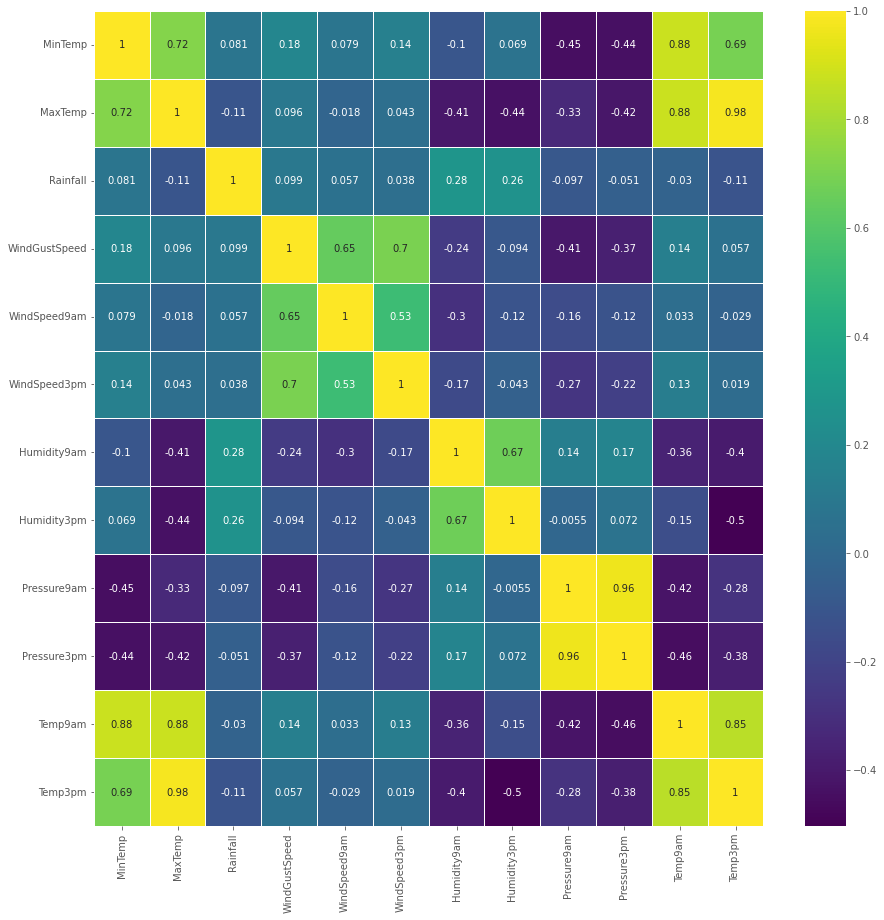

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt = '.2g', linewidth = 1, cmap='viridis')
plt.show()

We can clearly see that there is a high correlation between 'Temp9am' and 'MinTemp', between'Temp3pm' and 'MaxTemp', between 'Pressure9am' ans 'Pressure3pm'.

We have also observed that there are some columns with String values in our dataset. So, we have to deal with it. Because we cannot use such data types for making models.

So, we have to convert those data. And for that we use labelEncoder.

In [18]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [19]:
data.head(30)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
5,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0
6,14.3,25.0,0.0,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0
7,7.7,26.7,0.0,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0
8,9.7,31.9,0.0,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1
9,13.1,30.1,1.4,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,0


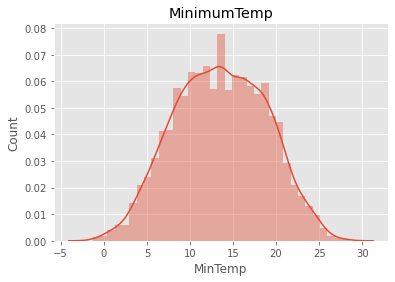

<Figure size 1080x1080 with 0 Axes>

In [20]:
sns.distplot(data['MinTemp'])
plt.xlabel('MinTemp')
plt.ylabel("Count")
plt.title("MinimumTemp")
plt.figure(figsize=(15,15))
plt.show();

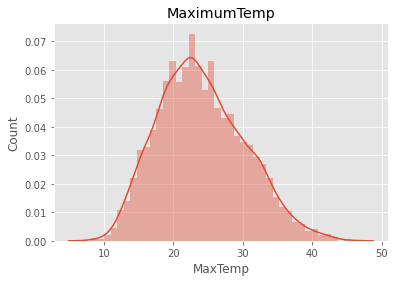

<Figure size 1080x1080 with 0 Axes>

In [21]:
sns.distplot(data['MaxTemp'])
plt.xlabel('MaxTemp')
plt.ylabel("Count")
plt.title("MaximumTemp")
plt.figure(figsize=(15,15))
plt.show();

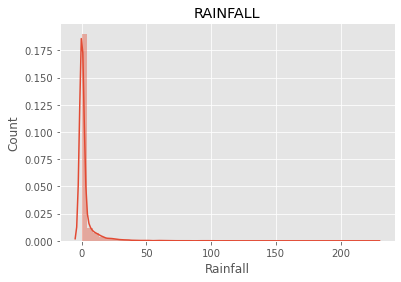

<Figure size 1080x1080 with 0 Axes>

In [22]:
sns.distplot(data['Rainfall'])
plt.xlabel('Rainfall')
plt.ylabel("Count")
plt.title("RAINFALL")
plt.figure(figsize=(15,15))
plt.show();

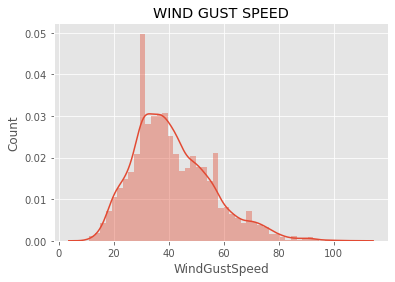

<Figure size 1080x1080 with 0 Axes>

In [23]:
sns.distplot(data['WindGustSpeed'])
plt.xlabel('WindGustSpeed')
plt.ylabel("Count")
plt.title("WIND GUST SPEED")
plt.figure(figsize=(15,15))
plt.show();

Here we are witnessing that some of the Features have Normally distributed Data.

##### Some more Visualization we can use :

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

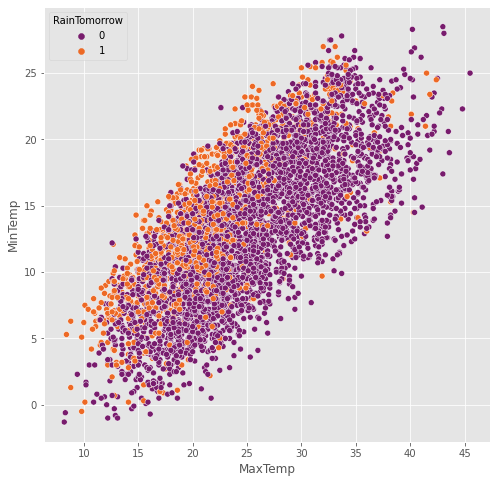

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='MaxTemp', y='MinTemp', hue='RainTomorrow', palette='inferno')

Through the Scatterplot we can say that there is a Linear relationship betwwen MinTemp and MaxTemp. And we can also say that there is Good chances of Raining Tomorrow as Orange Dots are representing that it is going to be Rain Tomorrow.  

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

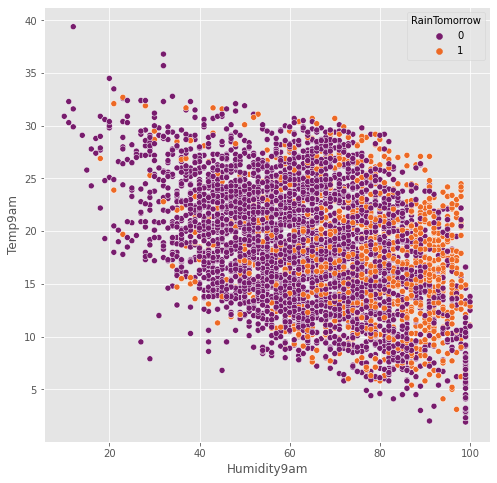

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='Humidity9am', y='Temp9am', hue='RainTomorrow', palette='inferno')

<AxesSubplot:>

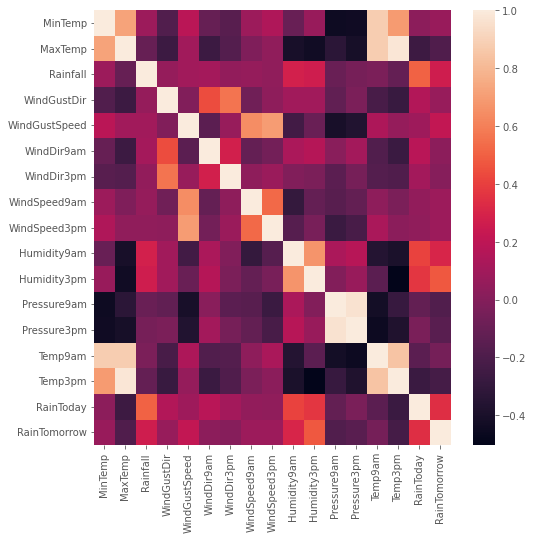

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())

Now, that everything is done, we can move on to next phase i.e, Modelling the Data

### Modelling the Data

##### Separating the Dataset in Features and Labels ( Defining X and Y)

In [27]:
X = data.drop(['RainTomorrow'], axis=1)
Y = data['RainTomorrow']

In [28]:
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

print(confusion_matrix(Y_test, lr_pred))
print('-'*60)
print()
print(classification_report(Y_test, lr_pred))
print('-'*60)
print()
print(accuracy_score(Y_test, lr_pred))

[[899  62]
 [141 165]]
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       961
           1       0.73      0.54      0.62       306

    accuracy                           0.84      1267
   macro avg       0.80      0.74      0.76      1267
weighted avg       0.83      0.84      0.83      1267

------------------------------------------------------------

0.8397790055248618


#### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)

print(confusion_matrix(Y_test, dt_pred))
print('-'*60)
print()
print(classification_report(Y_test, dt_pred))
print('-'*60)
print()
print(accuracy_score(Y_test, dt_pred))

[[874  87]
 [ 70 236]]
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       961
           1       0.73      0.77      0.75       306

    accuracy                           0.88      1267
   macro avg       0.83      0.84      0.83      1267
weighted avg       0.88      0.88      0.88      1267

------------------------------------------------------------

0.8760852407261247


#### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(Y_test, rfc_pred))
print('-'*60)
print()
print(classification_report(Y_test, rfc_pred))
print('-'*60)
print()
print(accuracy_score(Y_test, rfc_pred))

[[935  26]
 [ 75 231]]
------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       961
           1       0.90      0.75      0.82       306

    accuracy                           0.92      1267
   macro avg       0.91      0.86      0.88      1267
weighted avg       0.92      0.92      0.92      1267

------------------------------------------------------------

0.920284135753749


We have seen that the of the 3 Models, Random Forest Classifier has performed best with 92% .